In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from datetimerange import DateTimeRange
import seaborn as sns
import numpy as np

In [2]:
pd_incidents_2020 = gpd.read_file('../data/pd_incidents_2020.geojson/')

In [3]:
#convert incident occurred to datetime
pd_incidents_2020['incident_o'] = pd.to_datetime(pd_incidents_2020['incident_o'])

In [4]:
#add a column that only has the date in it
pd_incidents_2020['date'] = pd_incidents_2020['incident_o'].dt.strftime('%Y-%m-%d')

In [5]:
#filter to time period 7 days before and 7 days after derecho
derecho = pd_incidents_2020[(pd_incidents_2020['incident_o'] >= '04/26/2020') &
                                              (pd_incidents_2020['incident_o'] <= '05/10/2020 23:59:59')]

In [6]:
derecho.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4238 entries, 216 to 99315
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   victim_cou  3181 non-null   object        
 1   zip_code    2234 non-null   object        
 2   victim_num  4238 non-null   object        
 3   offense_ni  4238 non-null   object        
 4   rpa         2074 non-null   object        
 5   latitude    4214 non-null   object        
 6   victim_rac  3295 non-null   object        
 7   incident_n  4238 non-null   object        
 8   investigat  4238 non-null   object        
 9   offense_nu  4238 non-null   object        
 10  offense_de  4238 non-null   object        
 11  longitude   4214 non-null   object        
 12  domestic_r  4238 non-null   object        
 13  victim_eth  3293 non-null   object        
 14  incident_l  4227 non-null   object        
 15  victim_des  4238 non-null   object        
 16  location_c  4

In [7]:
#filter to 7 days before and 7 days after the tornado
tornado = pd_incidents_2020[(pd_incidents_2020['incident_o'] >= '02/25/2020') &
                                              (pd_incidents_2020['incident_o'] <= '03/10/2020 23:59:59')]

In [8]:
tornado.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4472 entries, 3 to 99314
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   victim_cou  3258 non-null   object        
 1   zip_code    2372 non-null   object        
 2   victim_num  4472 non-null   object        
 3   offense_ni  4470 non-null   object        
 4   rpa         2275 non-null   object        
 5   latitude    4447 non-null   object        
 6   victim_rac  3395 non-null   object        
 7   incident_n  4472 non-null   object        
 8   investigat  4472 non-null   object        
 9   offense_nu  4470 non-null   object        
 10  offense_de  4472 non-null   object        
 11  longitude   4447 non-null   object        
 12  domestic_r  4472 non-null   object        
 13  victim_eth  3395 non-null   object        
 14  incident_l  4458 non-null   object        
 15  victim_des  4471 non-null   object        
 16  location_c  447

In [9]:
#tornado_total

In [10]:
#zipcodes identified in a previous notebook as being the ones most affected to storm
tornado_zipcodes = ['37214', '37206', '37208', '37209', '37076', '37201', '37213', '37218']
derecho_zipcodes = ['37211', '37013', '37076', '37205', '37214']

In [11]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
zipcodes.head(2)

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."


In [12]:
#create geo dataframe with tornado time frame police incidents
tornado_zip = gpd.sjoin(tornado, zipcodes, op = 'within')
tornado_zip.shape

(4442, 38)

In [13]:
#create geo dataframe with derecho time frame police incidents
derecho_zip = gpd.sjoin(derecho, zipcodes, op = 'within')
derecho_zip.shape

(4213, 38)

## Created data frames with incidents inside and outside identified zipcode areas

In [14]:
tornado_zip_in = tornado_zip[tornado_zip['zip'].isin(tornado_zipcodes)]

In [15]:
tornado_zip_out = tornado_zip[~tornado_zip['zip'].isin(tornado_zipcodes)]

In [16]:
derecho_zip_in = derecho_zip[derecho_zip['zip'].isin(derecho_zipcodes)]

In [17]:
derecho_zip_out = derecho_zip[~derecho_zip['zip'].isin(derecho_zipcodes)]

In [18]:
derecho_zip_out.shape

(2945, 38)

In [19]:
derecho_zip_in.shape

(1268, 38)

In [20]:
2945 + 1268 #15 day total

4213

In [21]:
tornado_zip_in.shape

(1434, 38)

In [22]:
tornado_zip_out.shape

(3008, 38)

In [23]:
1434 + 3008 #15 day total

4442

In [24]:
#found number of incidents by day inside tornado area
tornado_zip_in_count = tornado_zip_in.date.value_counts().to_frame().reset_index()
tornado_zip_in_count['index'] = pd.to_datetime(tornado_zip_in_count['index'])
tornado_zip_in_count['day']= tornado_zip_in_count['index'].dt.strftime('%m/%d')
tornado_zip_in_count = tornado_zip_in_count.sort_values(by='day')
tornado_zip_in_count.drop('index', inplace=True, axis=1)
tornado_zip_in_count.rename(columns = {'date':'incidents_in', 'day':'date'}, inplace=True)
tornado_zip_in_count

,incidents_in,date
7,98,02/25
13,78,02/26
10,89,02/27
6,99,02/28
9,92,02/29
0,116,03/01
4,103,03/02
8,95,03/03
11,86,03/04
14,73,03/05


In [25]:
#found number of incidents by day outside tornado area
tornado_zip_out_count = tornado_zip_out.date.value_counts().to_frame().reset_index()
tornado_zip_out_count['index'] = pd.to_datetime(tornado_zip_out_count['index'])
tornado_zip_out_count['day']= tornado_zip_out_count['index'].dt.strftime('%m/%d')
tornado_zip_out_count = tornado_zip_out_count.sort_values(by='day')
tornado_zip_out_count.drop('index', inplace=True, axis=1)
tornado_zip_out_count.rename(columns = {'date':'incidents_out', 'day':'date'}, inplace=True)
tornado_zip_out_count

,incidents_out,date
1,223,02/25
13,166,02/26
12,168,02/27
4,215,02/28
3,217,02/29
0,242,03/01
10,193,03/02
14,161,03/03
11,186,03/04
6,208,03/05


In [26]:
#merged the previous two dataframes
tornado_merged = pd.merge(tornado_zip_in_count, tornado_zip_out_count, on = 'date')
tornado_merged.head()

,incidents_in,date,incidents_out
0,98,02/25,223
1,78,02/26,166
2,89,02/27,168
3,99,02/28,215
4,92,02/29,217


In [27]:
#created a totals column
tornado_merged['total'] = tornado_merged['incidents_in'] + tornado_merged['incidents_out']

In [28]:
#total 7 days prior to tornado
tornado_merged['total'].iloc[0:7].sum()

2099

In [29]:
#total 7 days after tornado
tornado_merged['total'].iloc[8:15].sum()

2087

In [30]:
#average number of incidents during torando time period
tornado_merged.total.mean()

296.1333333333333

In [31]:
#found number of incidents by day inside derecho area
derecho_zip_in_count = derecho_zip_in.date.value_counts().to_frame().reset_index()
derecho_zip_in_count['index'] = pd.to_datetime(derecho_zip_in_count['index'])
derecho_zip_in_count['day']= derecho_zip_in_count['index'].dt.strftime('%m/%d')
derecho_zip_in_count = derecho_zip_in_count.sort_values(by='day')
derecho_zip_in_count.drop('index', inplace=True, axis=1)
derecho_zip_in_count.rename(columns = {'date':'incidents_in', 'day':'date'}, inplace=True)
derecho_zip_in_count

,incidents_in,date
13,69,04/26
4,92,04/27
6,88,04/28
9,81,04/29
2,97,04/30
0,100,05/01
7,85,05/02
14,66,05/03
12,74,05/04
5,88,05/05


In [32]:
#found number of incidents by day outside derecho area
derecho_zip_out_count = derecho_zip_out.date.value_counts().to_frame().reset_index()
derecho_zip_out_count['index'] = pd.to_datetime(derecho_zip_out_count['index'])
derecho_zip_out_count['day']= derecho_zip_out_count['index'].dt.strftime('%m/%d')
derecho_zip_out_count = derecho_zip_out_count.sort_values(by='day')
derecho_zip_out_count.drop('index', inplace=True, axis=1)
derecho_zip_out_count.rename(columns = {'date':'incidents_out', 'day':'date'}, inplace=True)
derecho_zip_out_count

,incidents_out,date
8,194,04/26
6,200,04/27
4,218,04/28
11,177,04/29
5,206,04/30
0,234,05/01
3,225,05/02
12,166,05/03
9,183,05/04
1,228,05/05


In [33]:
#mereged previous two dataframes
derecho_merged = pd.merge(derecho_zip_in_count, derecho_zip_out_count, on = 'date')
derecho_merged.head()

,incidents_in,date,incidents_out
0,69,04/26,194
1,92,04/27,200
2,88,04/28,218
3,81,04/29,177
4,97,04/30,206


In [34]:
#created a totals columns
derecho_merged['total'] = derecho_merged['incidents_in'] + derecho_merged['incidents_out']

In [35]:
#total 7 days prior to derecho
derecho_merged['total'].iloc[0:7].sum()

2066

In [36]:
#total 7 days after derecho
derecho_merged['total'].iloc[8:15].sum()

1915

In [37]:
derecho_merged

,incidents_in,date,incidents_out,total
0,69,04/26,194,263
1,92,04/27,200,292
2,88,04/28,218,306
3,81,04/29,177,258
4,97,04/30,206,303
5,100,05/01,234,334
6,85,05/02,225,310
7,66,05/03,166,232
8,74,05/04,183,257
9,88,05/05,228,316


In [38]:
#testing out a chart
#f, ax = plt.subplots(figsize=(18,5))
#width= 0.5
#plt.bar(tornado_zip_in_count['day'], tornado_zip_in_count['date'], width)
#plt.bar(tornado_zip_in_count['day'], tornado_zip_out_count['date'], width, bottom = tornado_zip_out)
#ax.legend(fontsize = 14)
#plt.show()

In [39]:
#made this to try to get dates to show up on the chart below
derecho_dates = []
for row_ind, row_values in derecho_merged.iterrows():
    derecho_dates.append(row_values['date'])

In [40]:
derecho_dates

['04/26',
 '04/27',
 '04/28',
 '04/29',
 '04/30',
 '05/01',
 '05/02',
 '05/03',
 '05/04',
 '05/05',
 '05/06',
 '05/07',
 '05/08',
 '05/09',
 '05/10']

In [41]:
#not how I wanted it to look -- and when I added the total column it messed it up

#for d in derecho_merged.iterrows():
 #   derecho_dates = [d['date']]
#ind = [d for cd in derecho_dates]
#f, ax = plt.subplots(figsize=(18,5))
#derecho_merged.plot.bar(ax = ax, stacked=True, title="Derecho");
#plt.show(block=True);

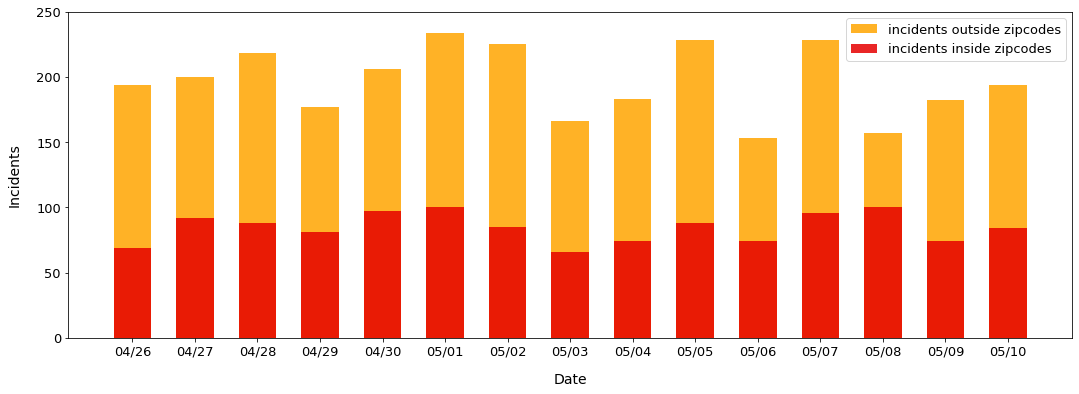

In [42]:
#tornado chart for presentation

f, ax = plt.subplots(figsize=(18,6))
width = 0.6
plt.bar(derecho_merged['date'], derecho_merged['incidents_out'], width, label = 'incidents outside zipcodes', color = '#ffa500', alpha = 0.85)
plt.bar(derecho_merged['date'], derecho_merged['incidents_in'], width, label = 'incidents inside zipcodes', color = '#e60000', alpha = 0.85)
plt.xticks(fontsize = 13)
plt.xlabel("Date", fontsize=14, labelpad=15)
plt.yticks(np.arange(0,300, step=50), fontsize =13)
plt.ylabel("Incidents", fontsize=14, labelpad=15)
#plt.title('Police Incidents Before and After Derecho', fontsize = 20)
ax.legend(loc = 'best', fontsize = 13)
plt.savefig('../data/derecho_chart')
plt.show();

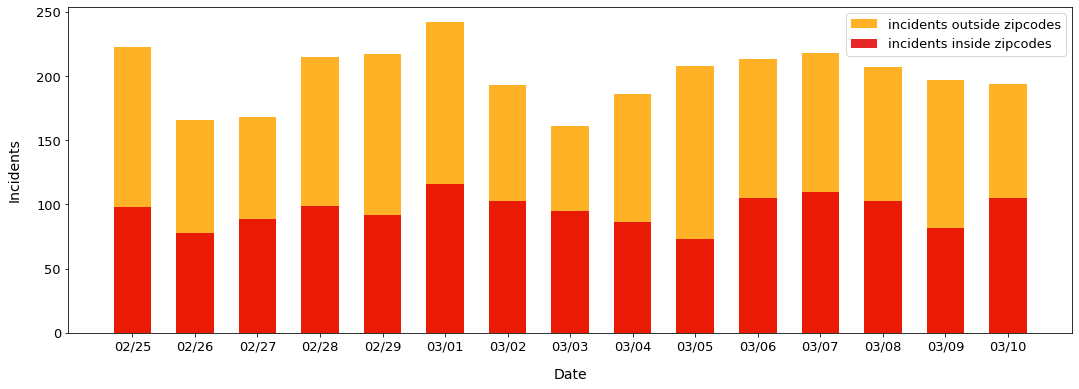

In [43]:
#derecho chart for presentation

f, ax = plt.subplots(figsize=(18,6))
width = 0.6
plt.bar(tornado_merged['date'], tornado_merged['incidents_out'], width, label = 'incidents outside zipcodes', color = '#ffa500', alpha = 0.85)
plt.bar(tornado_merged['date'], tornado_merged['incidents_in'], width, label = 'incidents inside zipcodes', color = '#e60000', alpha = 0.85)
plt.xticks(fontsize = 13)
plt.xlabel("Date", fontsize=14, labelpad=15)
plt.yticks(np.arange(0,300, step=50), fontsize =13)
plt.ylabel("Incidents", fontsize=14, labelpad=15)
#plt.title('Police Incidents Before and After Tornado', fontsize = 20)
ax.legend(loc = 'best', fontsize = 13)
plt.savefig('../data/tornado_chart')
plt.show();

In [44]:
#tornado path data
tornado_path = pd.read_csv('../data/tornado.csv')
tornado_path.head(2)

,EF_Scale,longitude,latitude,altitude
0,EF1,-84.92104,36.13007,3.0
1,EF1,-84.93339,36.13181,3.0


In [45]:
#created geomtry column
tornado_path['geometry'] = tornado_path.apply(lambda x: Point((float(x.longitude), 
                                                         float(x.latitude))), 
                                        axis=1)

In [46]:
#created geo data frame
tornado_geo = gpd.GeoDataFrame(tornado, 
                                     crs = zipcodes.crs,
                                     geometry = tornado_path['geometry'])

In [47]:
#joined tornado with zipcodes
tornado_geo_zipcodes = gpd.sjoin(tornado_geo, zipcodes, op = 'within')

In [48]:
tornado_geo.shape

(4472, 32)

In [49]:
#from Paul's group tornado map code
tornado_force = ['EF5', 'EF4', 'EF3', 'EF2'] # here I define the strength I want to plot
tornado_lat_low = 36.168 # this is the geographic latitude range
tornado_lat_high = 36.188
#now keep only the records where strength is greater than EF1
tornado_geo = tornado_geo.loc[tornado_geo['EF_Scale'].isin(tornado_force)]
#tornado.shape
tornado_geo.shape

KeyError: 'EF_Scale'

In [ ]:
#folium map with tornado path
tornado_map = folium.Map(location = (36.16784, -86.77816), zoom_start = 10)
folium.GeoJson(zipcodes['geometry']).add_to(tornado_map)

points_plt=[]
for ind, row in tornado.iterrows():
    point = [row['latitude'], row['longitude']]
    popup = 'Tornado strength ' + str(row['EF_Scale']) + ' at ' + str(row['latitude']) + ": " +str(row['longitude'])
    #now color format based on the strength of the tornado
    if row['EF_Scale']=="EF3":
        folium.Marker(point, popup = popup, icon = folium.Icon(color='darkred', icon='bolt', prefix='fa')) #.add_to(tornado_map)
    else:
        folium.Marker(point, popup = popup, icon = folium.Icon(color='lightred', icon='bolt', prefix='fa')) #.add_to(tornado_map)
        points_plt.append(point)
        
folium.PolyLine(locations = points_plt, color="red", weight=5, opacity=1).add_to(tornado_map)

In [ ]:
tornado_map

In [51]:
#created data frame for areas inside and outside tornado area
zipcodes_tornado_in = zipcodes[zipcodes['zip'].isin(['37214', '37206', '37208', '37209', '37076', '37201', '37213', '37218'])]
zipcodes_tornado_out = zipcodes[~zipcodes['zip'].isin(['37214', '37206', '37208', '37209', '37076', '37201', '37213', '37218'])]

In [52]:
zipcodes.head()

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


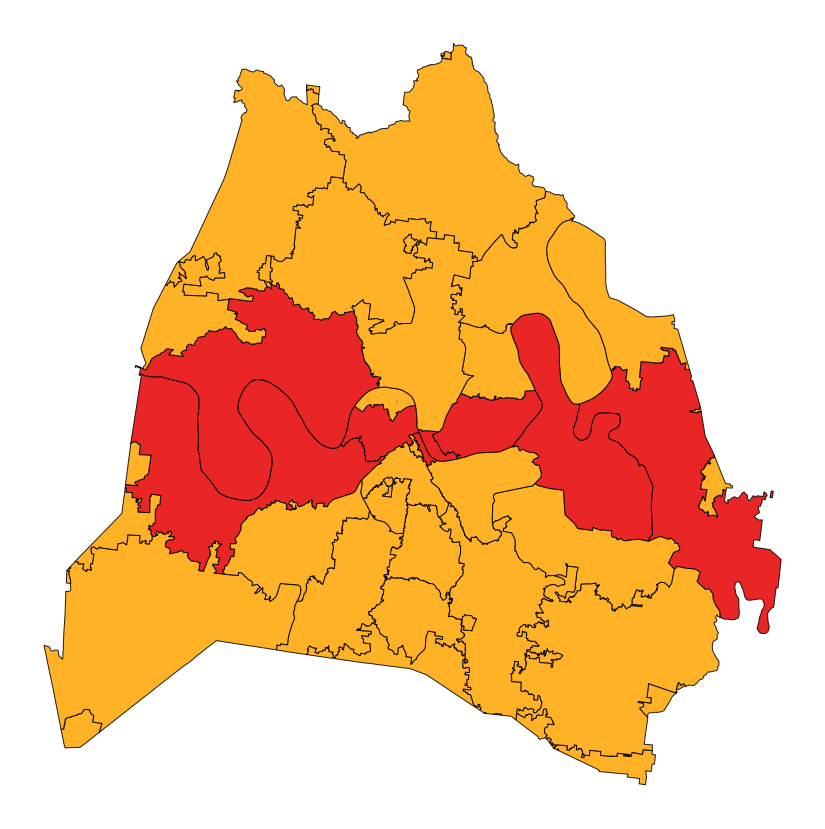

In [53]:
#tornado map for presentation
fig, ax = plt.subplots(figsize=(26,15))
zipcodes_tornado_in.plot(color = '#e60000', alpha = .85, edgecolor = 'black', 
              legend = True,
              ax = ax)
zipcodes_tornado_out.plot(color = '#ffa500', alpha = .85, edgecolor = 'black', 
              legend = True,
              ax = ax)
#plt.title('Zipcodes Impacted Most by Tornado', fontsize = 20);
ax.axis('off')
plt.savefig('../data/tornado_map');

In [54]:
#created data frame for areas inside and outside derecho area
zipcodes_derecho_in = zipcodes[zipcodes['zip'].isin(['37211', '37013', '37076', '37205', '37214'])]
zipcodes_derecho_out = zipcodes[~zipcodes['zip'].isin(['37211', '37013', '37076', '37205', '37214'])]

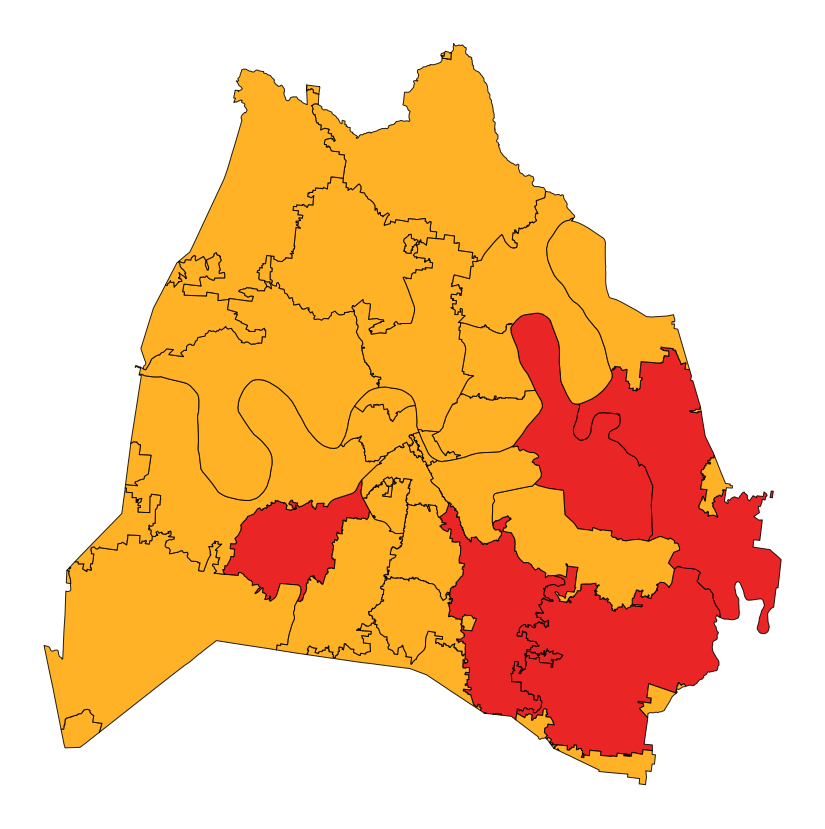

In [55]:
#derecho map for presentation
fig, ax = plt.subplots(figsize=(26,15))
zipcodes_derecho_in.plot(color = '#e60000', alpha = 0.85, edgecolor = 'black', 
              legend = True,
              ax = ax)
zipcodes_derecho_out.plot(color = '#ffa500', alpha = 0.85, edgecolor = 'black', 
              legend = True,
              ax = ax)
#plt.title('Zipcodes Impacted Most by Derecho', fontsize = 20)
ax.axis('off')
plt.savefig('../data/derecho_map');

In [58]:
tornado_zip.head()

,victim_cou,zip_code,victim_num,offense_ni,rpa,latitude,victim_rac,incident_n,investigat,offense_nu,...,incident_o,primary_ke,geometry,date,index_right,zip,objectid,po_name,shape_stlength,shape_starea
3,None,None,1,290,None,36.09,None,20200163017,Open,1,...,2020-03-06 06:00:00,20200163017_11,POINT (-86.69000 36.09000),2020-03-06,49,37211,39,NASHVILLE,290587.58467925159,602215091.79736328
573,RESIDENT,37211,1,13B,8655,36.046,B,20200425781,Closed,1,...,2020-02-25 03:30:00,20200425781_11,POINT (-86.71800 36.04600),2020-02-25,49,37211,39,NASHVILLE,290587.58467925159,602215091.79736328
1650,RESIDENT,None,1,23F,None,36.07,B,20200161421,Open,1,...,2020-03-05 22:00:00,20200161421_11,POINT (-86.69000 36.07000),2020-03-05,49,37211,39,NASHVILLE,290587.58467925159,602215091.79736328
1687,RESIDENT,None,3,23F,None,36.07,U,20200161421,Open,1,...,2020-03-05 22:00:00,20200161421_13,POINT (-86.69000 36.07000),2020-03-05,49,37211,39,NASHVILLE,290587.58467925159,602215091.79736328
4106,RESIDENT,None,2,23F,None,36.07,B,20200161421,Open,1,...,2020-03-05 22:00:00,20200161421_12,POINT (-86.69000 36.07000),2020-03-05,49,37211,39,NASHVILLE,290587.58467925159,602215091.79736328
